In [31]:
import sys
path = sys.path[0] + '/'
path

'/Users/maitreyasinha/IIT-B Course/Data Mining/Portfolio-Analysis/'

In [57]:
import numpy as np
import sklearn
import talib
import yahoo_fin.stock_info as si
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import talib

import matplotlib.pyplot as plt

from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num

In [3]:
# Get today's date as UTC timestamp
today = datetime.today().strftime("%d/%m/%Y")
today = datetime.strptime(today + " +0000", "%d/%m/%Y %z")
to = int(today.timestamp())

# Get date ten years ago as UTC timestamp
ten_yr_ago = today-relativedelta(years=10)
fro = int(ten_yr_ago.timestamp())


In [6]:
ten_yr_ago

datetime.datetime(2010, 12, 13, 0, 0, tzinfo=datetime.timezone.utc)

In [83]:
def get_price_hist(ticker):
    data = si.get_data(ticker)
    data.dropna(inplace=True)
    return data

In [85]:
nflx_df = get_price_hist("TATAMOTORS.NS")
nflx_df

,open,high,low,close,adjclose,volume,ticker
1991-01-02,20.959600,21.857901,20.959600,21.857901,4.031160,0.0,TATAMOTORS.NS
1991-01-03,20.959600,21.857901,20.959600,21.857901,4.031160,0.0,TATAMOTORS.NS
1991-01-07,20.360800,21.259001,20.061300,21.109301,3.893099,0.0,TATAMOTORS.NS
1991-01-09,21.259001,21.259001,20.061300,20.510500,3.782665,0.0,TATAMOTORS.NS
1991-01-11,20.360800,20.959600,20.061300,20.959600,3.865490,0.0,TATAMOTORS.NS
...,...,...,...,...,...,...,...
2020-12-07,184.449997,186.449997,182.699997,183.550003,183.550003,29802472.0,TATAMOTORS.NS
2020-12-08,184.949997,185.699997,178.949997,181.800003,181.800003,42143391.0,TATAMOTORS.NS
2020-12-09,183.000000,186.399994,181.649994,182.699997,182.699997,40300535.0,TATAMOTORS.NS
2020-12-10,182.699997,182.699997,176.399994,177.600006,177.600006,38368777.0,TATAMOTORS.NS


In [128]:
def get_indicators(data):
    # Get MACD
    data["macd"], data["macd_signal"], data["macd_hist"] = talib.MACD(data['close'])
    
    # Get MA10 and MA30
    data["ma10"] = talib.MA(data["close"], timeperiod=10)
    data["ma30"] = talib.MA(data["close"], timeperiod=30)
    
    # Get RSI
    data["rsi"] = talib.RSI(data["close"])
    
    #Get the Average True Range
    data['ATR'] = talib.ATR(data['high'], data['low'], data['close'])
    
    return data.dropna()

In [129]:
nflx_df2 = get_indicators(nflx_df)
nflx_df2

,open,high,low,close,adjclose,volume,ticker,macd,macd_signal,macd_hist,ma10,ma30,rsi,ATR
1991-03-13,21.408701,21.857901,21.259001,21.708200,4.003551,0.0,TATAMOTORS.NS,0.410454,0.178120,0.232334,22.217190,20.385710,53.037632,1.092228
1991-03-15,21.259001,22.157301,21.259001,21.708200,4.003551,0.0,TATAMOTORS.NS,0.408427,0.224182,0.184246,22.157310,20.410663,53.037632,1.078376
1991-03-18,21.259001,21.558399,20.959600,21.259001,3.920709,0.0,TATAMOTORS.NS,0.366351,0.252615,0.113736,21.977650,20.440603,49.298564,1.054820
1991-03-20,20.959600,21.259001,20.061300,20.959600,3.865490,0.0,TATAMOTORS.NS,0.305327,0.263158,0.042169,21.827940,20.470547,46.924063,1.065026
1991-03-21,20.360800,21.109301,20.360800,20.959600,3.865490,0.0,TATAMOTORS.NS,0.254036,0.261333,-0.007297,21.678230,20.510470,46.924063,1.042417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-07,184.449997,186.449997,182.699997,183.550003,183.550003,29802472.0,TATAMOTORS.NS,11.649213,10.503653,1.145560,178.420001,155.781667,76.934410,6.312952
2020-12-08,184.949997,185.699997,178.949997,181.800003,181.800003,42143391.0,TATAMOTORS.NS,11.266887,10.656300,0.610587,179.530002,157.275000,73.480768,6.344170
2020-12-09,183.000000,186.399994,181.649994,182.699997,182.699997,40300535.0,TATAMOTORS.NS,10.910740,10.707188,0.203552,180.595001,158.908333,74.124104,6.230301
2020-12-10,182.699997,182.699997,176.399994,177.600006,177.600006,38368777.0,TATAMOTORS.NS,10.100531,10.585857,-0.485325,181.210002,160.306667,64.565540,6.235279


In [130]:
def plot_chart(data, n, ticker, save=False):
    
    # Filter number of observations to plot
    data = data.iloc[-n:]
    
    # Create figure and set axes for subplots
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    ax_vol = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
#     ax_atr = fig.add_axes((0, 0, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart
    ax_candle.plot(data.index , data["close"], label="Closing" ,linewidth=2,)
    ax_candle.plot(data.index, data["ma10"], label="MA10")
    ax_candle.plot(data.index, data["ma30"], label="MA30")
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    
    # Plot MACD
    ax_macd.set_ylabel("MACD")
    ax_macd.plot(data.index, data["macd"], label="macd")
    ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["macd_signal"], label="signal")
    ax_macd.legend()
    
    # Plot RSI
    # Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel(" RSI (%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["rsi"], label="rsi")
    ax_rsi.legend()
    
    # Show volume in millions
    ax_vol.set_ylabel("Volatility")
    ax_vol.plot(data.index, data["ATR"], label="Average True Range")
    ax_vol.legend()
    
    # Save the chart as PNG
    if save:
        fig.savefig(path + ticker + ".jpeg", bbox_inches="tight", dpi=300)
    
    plt.show()

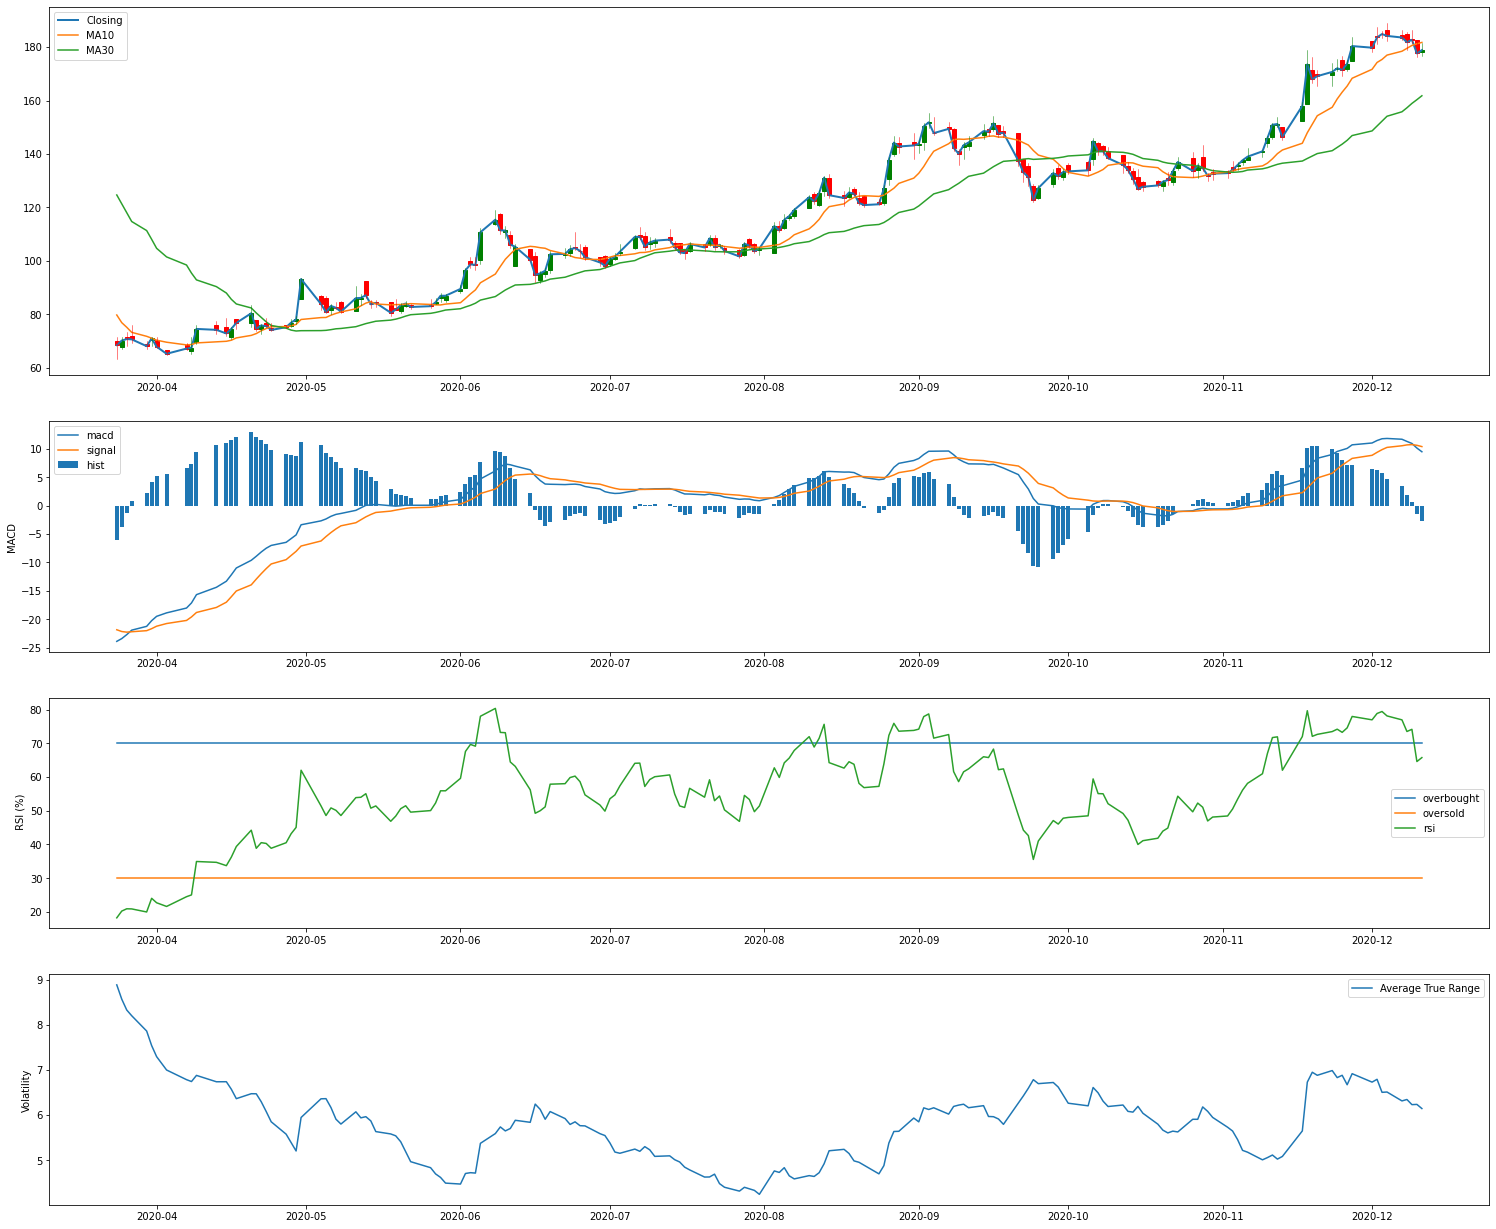

In [131]:
ticker = "TATAMOTORS.NS"
df = get_price_hist(ticker)
df = get_indicators(df)
plot_chart(df, 180, ticker, save=False)